In [38]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 5,4

In [39]:
dataset = pd.read_csv('/home/simriti/Desktop/new_delhi_hum_forecast.csv')
dataset['DATE'] = pd.to_datetime(dataset['DATE'], infer_datetime_format = True)
indexedDataset = dataset.set_index(['DATE'])


In [40]:
from datetime import datetime
print(indexedDataset.tail(5))


              hum
DATE             
2011-08-01  75.16
2011-09-01  71.15
2011-10-01  58.94
2011-11-01  66.80
2011-12-01  69.25


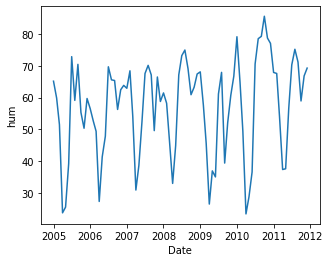

In [42]:
from datetime import datetime
plt.xlabel('Date')
plt.ylabel('hum')
plt.plot(indexedDataset)

In [43]:
rolmean = indexedDataset.rolling(window = 12).mean()
rolstd = indexedDataset.rolling(window = 12).std()
print(rolmean,rolstd)

                  hum
DATE                 
2005-01-01        NaN
2005-02-01        NaN
2005-03-01        NaN
2005-04-01        NaN
2005-05-01        NaN
...               ...
2011-08-01  65.593333
2011-09-01  64.921667
2011-10-01  62.706667
2011-11-01  61.716667
2011-12-01  61.070000

[84 rows x 1 columns]                   hum
DATE                 
2005-01-01        NaN
2005-02-01        NaN
2005-03-01        NaN
2005-04-01        NaN
2005-05-01        NaN
...               ...
2011-08-01  15.933836
2011-09-01  15.470816
2011-10-01  14.095202
2011-11-01  13.263993
2011-12-01  12.624347

[84 rows x 1 columns]


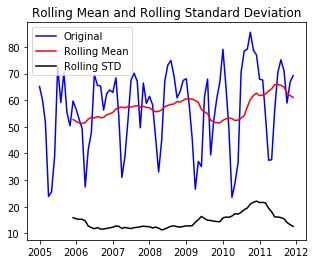

In [44]:
orig = plt.plot(indexedDataset, color = 'blue', label = 'Original')
mean_ = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black' , label = 'Rolling STD')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Standard Deviation')
plt.show(block = False)

In [45]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dicky-Fuller test: ')
dftest = adfuller(indexedDataset['hum'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statitics','p-value','#Lag value','no. of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)' %key] = value
    
print(dfoutput)

Results of Dicky-Fuller test: 
Test Statitics              -2.095863
p-value                      0.246181
#Lag value                  12.000000
no. of observations used    71.000000
Critical value (1%)         -3.526005
Critical value (5%)         -2.903200
Critical value (10%)        -2.588995
dtype: float64


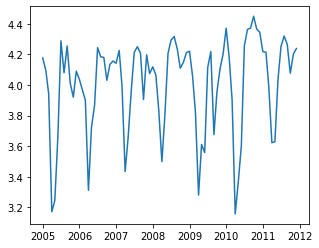

In [46]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

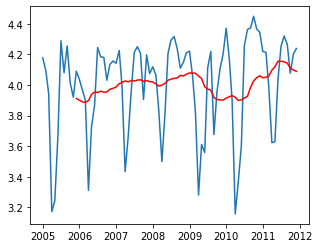

In [47]:
movingAverage = indexedDataset_logScale.rolling(window = 12).mean()
movingSTD = indexedDataset_logScale.rolling(window = 12 ).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color = 'red')

In [48]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(15)

,hum
DATE,
2005-01-01,NaN
2005-02-01,NaN
2005-03-01,NaN
2005-04-01,NaN
2005-05-01,NaN
2005-06-01,NaN
2005-07-01,NaN
2005-08-01,NaN
2005-09-01,NaN


In [49]:
datasetLogScaleMinusMovingAverage.dropna(inplace = True)
print(datasetLogScaleMinusMovingAverage.head(5))

                 hum
DATE                
2005-12-01  0.177750
2006-01-01  0.135485
2006-02-01  0.074207
2006-03-01  0.014739
2006-04-01 -0.586539


In [50]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window = 12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean_ = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black' , label = 'Rolling STD')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Rolling Standard Deviation')
    plt.show(block = False)
    
    #Perform Dicky-Fuller test
    print('Results of Dicky-Fuller test: ')
    dftest = adfuller(timeseries['hum'], autolag = 'AIC')

    dfoutput = pd.Series(dftest[0:4], index = ['Test Statitics','p-value','#Lag value','no. of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value

    print(dfoutput)


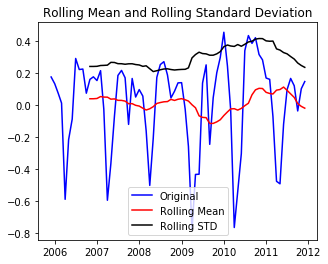

Results of Dicky-Fuller test: 
Test Statitics              -2.250184
p-value                      0.188538
#Lag value                  12.000000
no. of observations used    60.000000
Critical value (1%)         -3.544369
Critical value (5%)         -2.911073
Critical value (10%)        -2.593190
dtype: float64


In [51]:
test_stationarity(datasetLogScaleMinusMovingAverage)

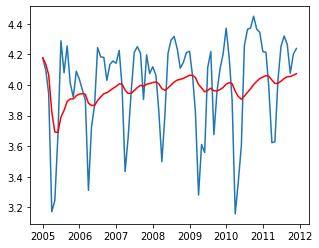

In [52]:
expotentialDecayWeightAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(expotentialDecayWeightAverage, color = 'red')

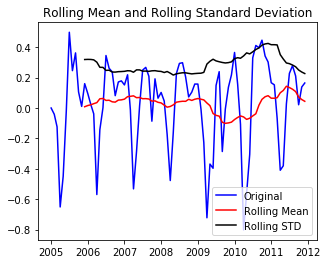

Results of Dicky-Fuller test: 
Test Statitics              -2.119301
p-value                      0.236825
#Lag value                  12.000000
no. of observations used    71.000000
Critical value (1%)         -3.526005
Critical value (5%)         -2.903200
Critical value (10%)        -2.588995
dtype: float64


In [53]:
datasetLogScaleMinusMovingExponentDecayAverage = indexedDataset_logScale - expotentialDecayWeightAverage
datasetLogScaleMinusMovingExponentDecayAverage.dropna(inplace = True)
test_stationarity(datasetLogScaleMinusMovingExponentDecayAverage)

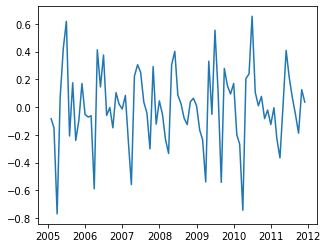

In [54]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

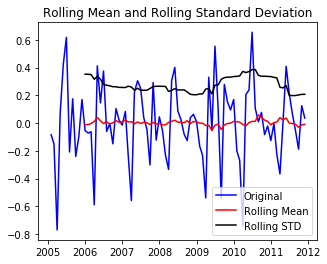

Results of Dicky-Fuller test: 
Test Statitics              -3.751827
p-value                      0.003440
#Lag value                  11.000000
no. of observations used    71.000000
Critical value (1%)         -3.526005
Critical value (5%)         -2.903200
Critical value (10%)        -2.588995
dtype: float64


In [55]:
datasetLogDiffShifting.dropna(inplace = True)
test_stationarity(datasetLogDiffShifting)

In [56]:
indexedDataset_logScale

,hum
DATE,
2005-01-01,4.176539
2005-02-01,4.092176
2005-03-01,3.941970
2005-04-01,3.171365
2005-05-01,3.243764
...,...
2011-08-01,4.319619
2011-09-01,4.264790
2011-10-01,4.076520


In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [58]:
decomposition = seasonal_decompose(indexedDataset_logScale,freq=30)

/home/simriti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


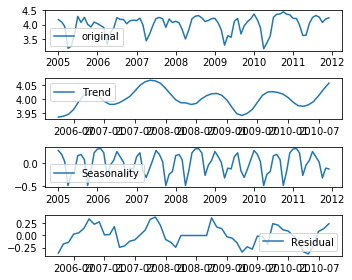

In [59]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')
plt.tight_layout()

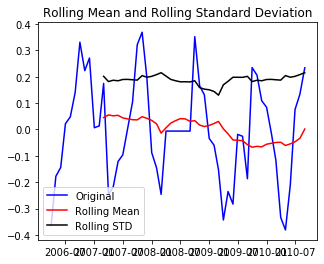

Results of Dicky-Fuller test: 


KeyError: 'hum'

In [60]:
decomposeLogData = residual
decomposeLogData.dropna(inplace = True)
test_stationarity(decomposeLogData)

/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Partial Autocorrelation Function')

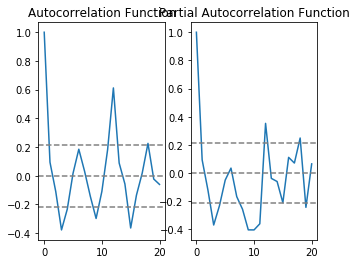

In [61]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffShifting, nlags = 20)
lag_pacf = pacf(datasetLogDiffShifting, nlags = 20, method = 'ols')

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0 , linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle ='--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle ='--', color = 'gray')
plt.title('Autocorrelation Function')

#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0 , linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle ='--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle ='--', color = 'gray')
plt.title('Partial Autocorrelation Function')

/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


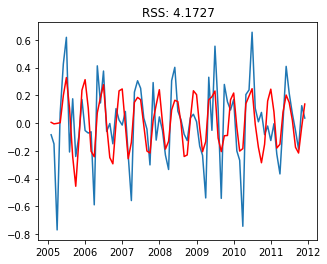

In [71]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexedDataset_logScale, order = (2,1,3))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues , color = 'red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues - datasetLogDiffShifting['hum'])**2))
print('Plotting AR Model')

/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


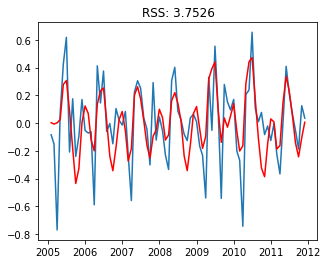

In [70]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexedDataset_logScale, order = (2,1,4))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues , color = 'red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues - datasetLogDiffShifting['hum'])**2))
print('Plotting AR Model')

/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


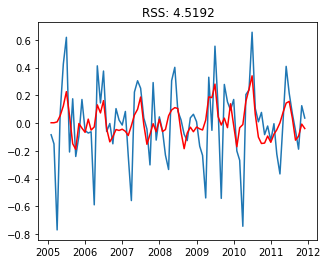

In [72]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexedDataset_logScale, order = (1,1,4))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues , color = 'red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues - datasetLogDiffShifting['hum'])**2))
print('Plotting AR Model')

/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


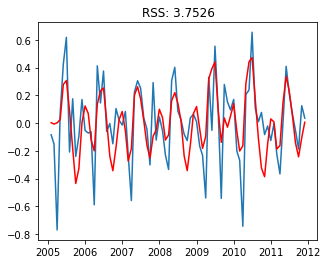

In [30]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexedDataset_logScale, order = (2,1,4))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues , color = 'red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues - datasetLogDiffShifting['hum'])**2))
print('Plotting AR Model')

/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/simriti/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA Model


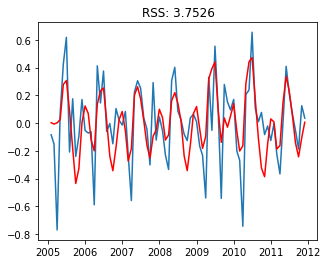

In [73]:
model = ARIMA(indexedDataset_logScale, order= (2,1,4))
results_ARIMA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues , color = 'red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['hum'])**2))
print('Plotting ARIMA Model')

In [74]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())





#convert to cummulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

DATE
2005-02-01    0.002614
2005-03-01   -0.007061
2005-04-01    0.001312
2005-05-01    0.025244
2005-06-01    0.278419
dtype: float64
DATE
2005-02-01    0.002614
2005-03-01   -0.004447
2005-04-01   -0.003135
2005-05-01    0.022110
2005-06-01    0.300528
dtype: float64


In [75]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['hum'], index = indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head(5)

DATE
2005-01-01    4.176539
2005-02-01    4.094789
2005-03-01    3.937523
2005-04-01    3.168230
2005-05-01    3.265873
dtype: float64

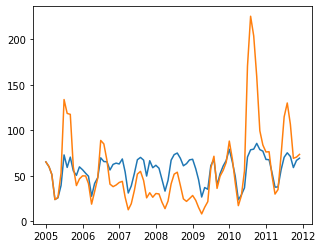

In [76]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

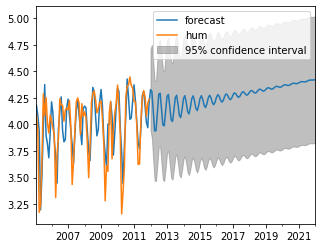

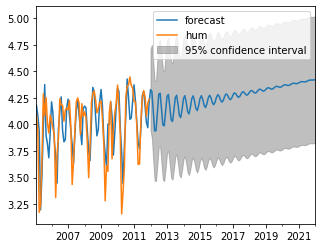

In [77]:
results_ARIMA.plot_predict(1,204)